## Import Libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

C:\Users\94777\AppData\Local\Temp\ipykernel_20012\2625918399.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_MFCCs.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,aggressiveness
0,-581.18304,61.775310,0.334518,8.486256,0.788418,11.279878,-6.216891,0.534891,2.526564,-0.257104,-0.805913,-0.914089,-2.371790,1
1,-574.66840,56.525585,-2.960935,8.754062,1.412463,7.794606,-5.879593,-1.438899,0.365388,-1.025561,-1.278394,-1.151001,-9.105648,1
2,-628.37790,69.173580,-5.179301,4.144491,-2.561467,12.802252,-1.245774,0.469771,1.913076,-0.159788,-1.885625,-7.068508,-4.552937,1
3,-577.23940,67.032510,5.281436,11.227827,3.101099,18.982237,-5.887117,1.355586,6.083599,1.585905,2.887235,3.166880,-1.952211,1
4,-540.83923,89.908420,8.104260,13.206378,1.857440,19.507902,-5.437987,3.933926,7.808056,0.806630,1.848405,-6.200817,-10.122912,1


In [3]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [5]:
x_train

array([[-3.12252440e+02,  1.10395935e+02,  5.50298700e+00, ...,
        -9.92282900e+00,  1.43778230e+00, -3.65631200e+00],
       [-3.84628020e+02,  7.00578100e+01, -1.55620740e+00, ...,
         2.55144900e-01, -1.44640200e+00, -4.73728130e+00],
       [-3.58738830e+02,  9.27196600e+01,  4.92793800e+01, ...,
        -2.39696380e+00, -7.86478040e-01, -1.86968020e+00],
       ...,
       [-4.15296540e+02,  5.06668000e+01,  5.14328540e-01, ...,
        -9.52846100e+00, -1.60183270e+00, -1.65781450e+00],
       [-3.75179900e+02,  7.93287050e+01,  4.47799000e+01, ...,
        -1.49006600e+00, -8.65304100e-01, -5.68980930e+00],
       [-3.97866150e+02,  1.19411415e+02,  4.18258500e+01, ...,
        -2.45105960e+00, -5.58940500e+00, -2.96286700e+00]])

In [6]:
# Get the data count of unique labels
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 1481, 1: 1508}

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [8]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
import pickle
# Save the scaler
with open('Models//scaler_2.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [11]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13, 1), (748, 13, 1), (2989,), (748,))

## Modeling

#### Import Libraries for Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [14]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [15]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(13,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1,kernel_initializer=intializer))
model.add(Activation('sigmoid'))

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 128)           768       
                                                                 
 activation (Activation)     (None, 13, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           82048     
                                                                 
 activation_1 (Activation)   (None, 13, 128)           0         
                                                                 
 dropout (Dropout)           (None, 13, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 128)            0         
 D)                                                              
                                                        

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.0001))

In [18]:
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/50




94/94 [==============================] - 2s 8ms/step - loss: 0.6082 - accuracy: 0.7899 - val_loss: 0.4376 - val_accuracy: 0.8235
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3873 - accuracy: 0.8494 - val_loss: 0.3648 - val_accuracy: 0.8570
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3489 - accuracy: 0.8668 - val_loss: 0.3295 - val_accuracy: 0.8717
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3204 - accuracy: 0.8789 - val_loss: 0.2998 - val_accuracy: 0.8783
Epoch 5/50
94/94 [==============================] - 1s 5ms/step - loss: 0.2894 - accuracy: 0.8899 - val_loss: 0.2760 - val_accuracy: 0.8864
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2666 - accuracy: 0.9003 - val_loss: 0.2529 - val_accuracy: 0.8984
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2479 - accuracy: 0.9050 - val_loss: 0.2332 - val_accuracy: 0.9051
Epoch 8/50
94/94 [===========

In [19]:
def show_graphs(history):
    epochs = [i for i in range(50)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

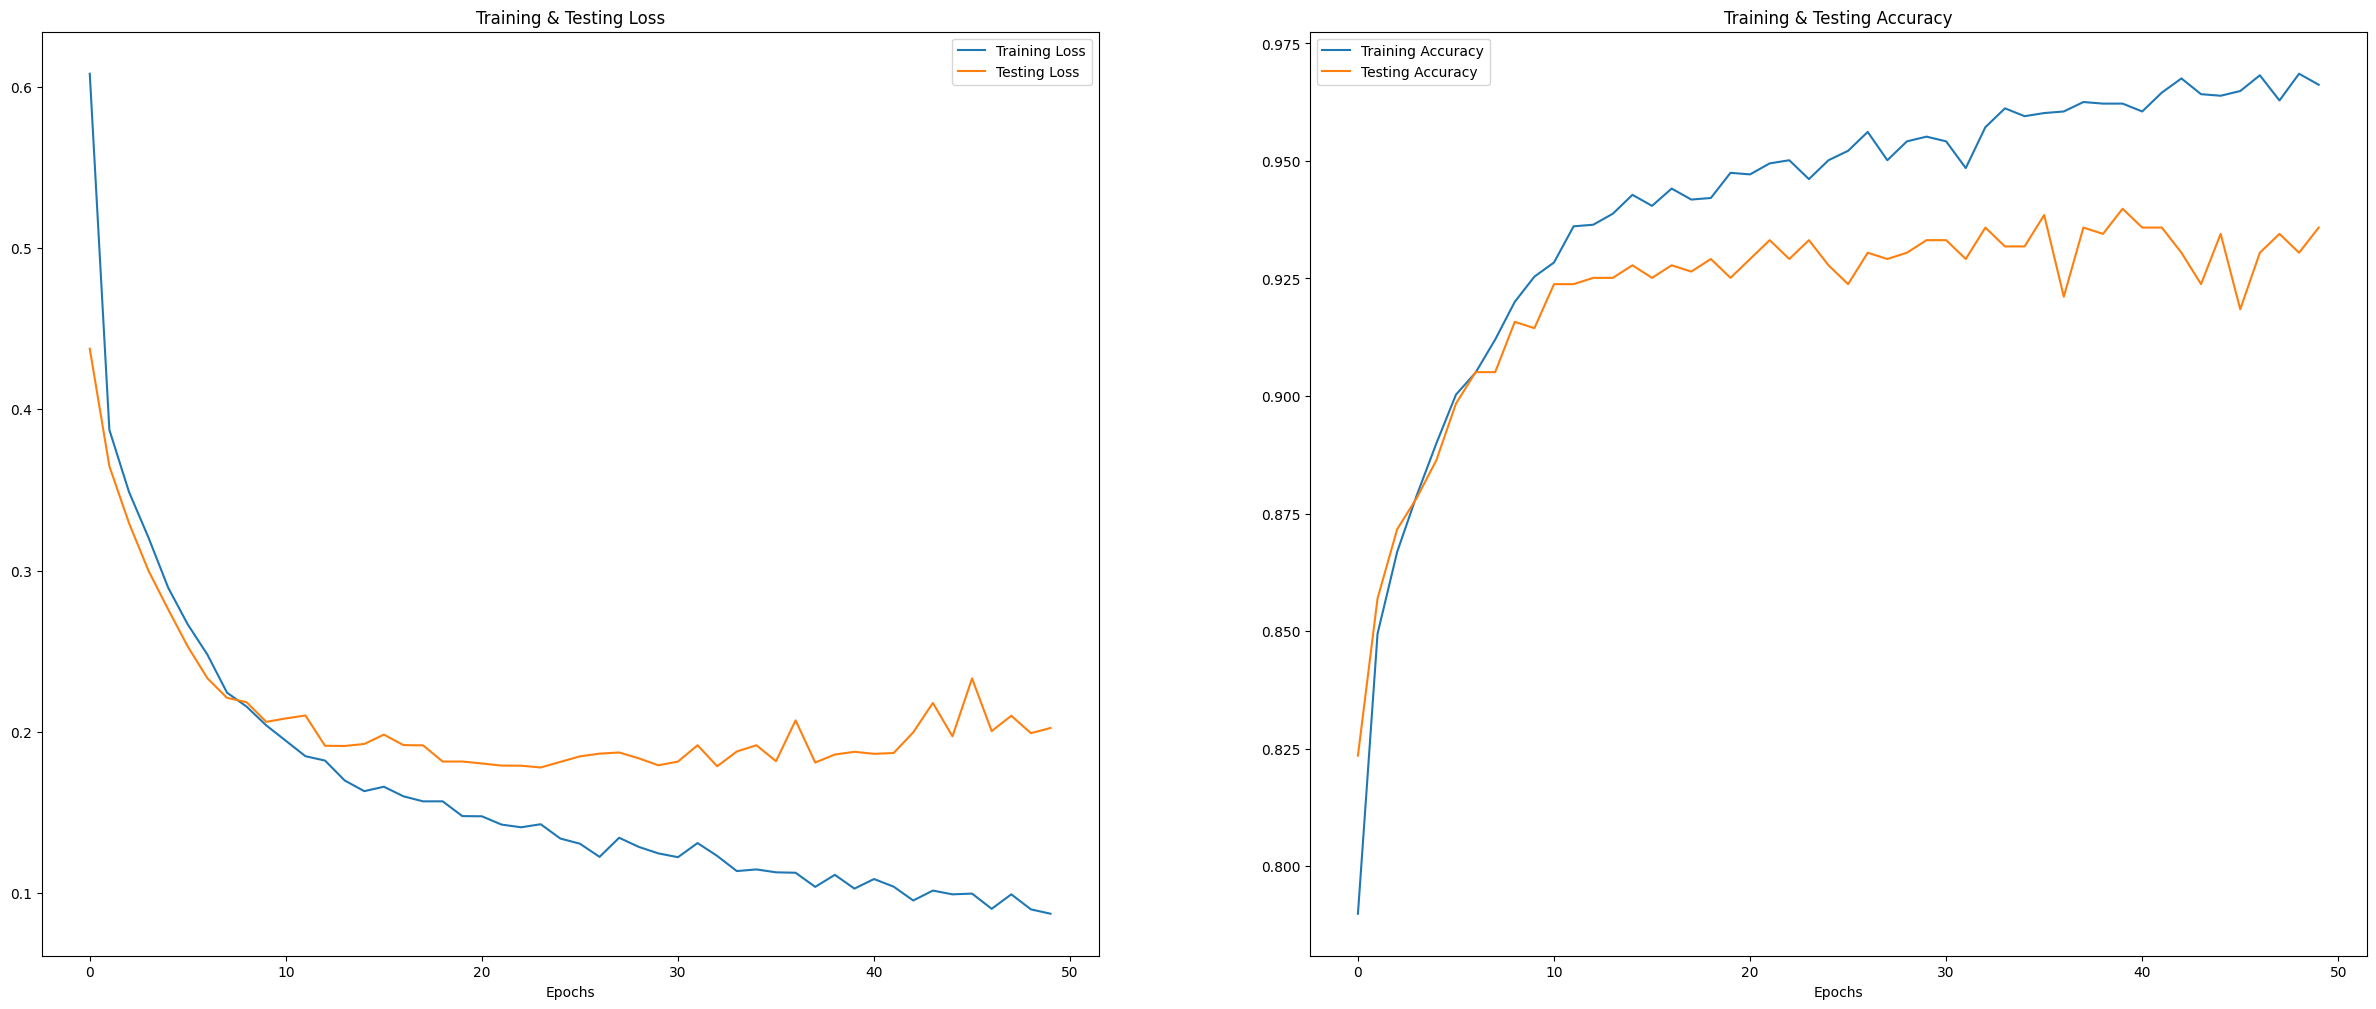

In [20]:
show_graphs(model.history)

In [21]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 2ms/step


In [22]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

In [23]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [24]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

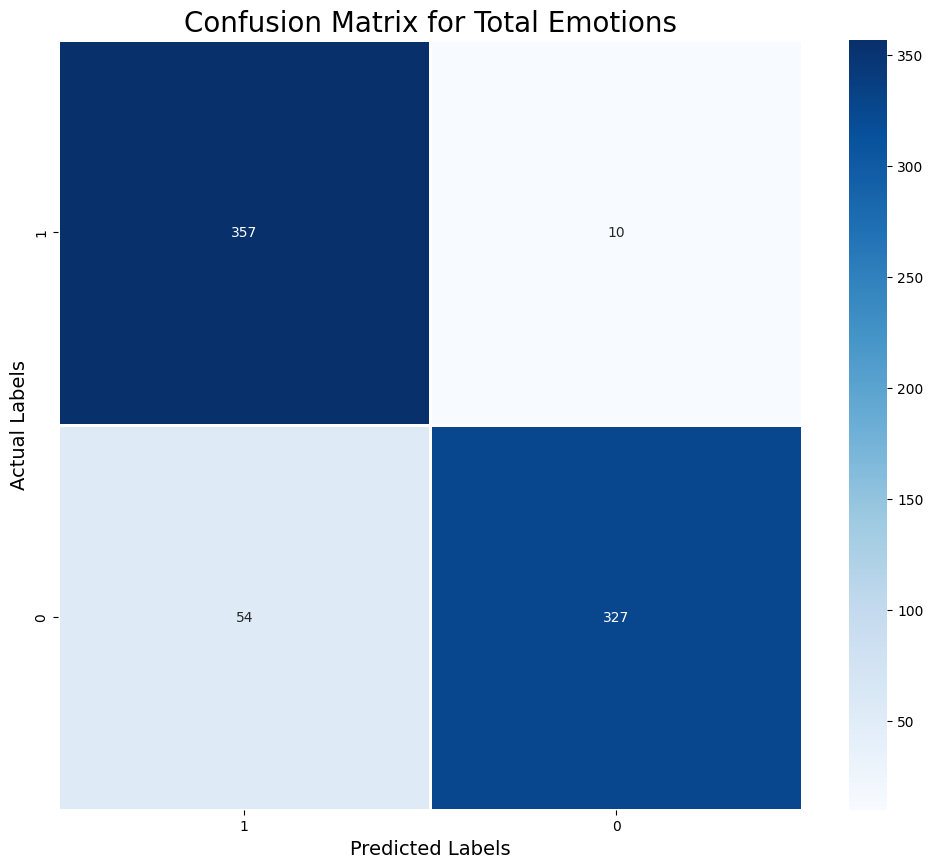

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [26]:
accuracy_score(y_test, y_pred)

0.9144385026737968

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       367
           1       0.97      0.86      0.91       381

    accuracy                           0.91       748
   macro avg       0.92      0.92      0.91       748
weighted avg       0.92      0.91      0.91       748



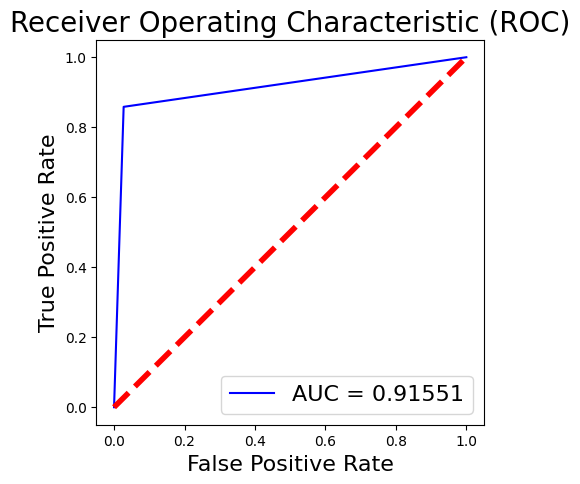

In [28]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

In [29]:
# # Save model
# model.save('Models/cnn_model_1.h5')

### Testing

In [30]:
import librosa

In [31]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return np.mean(mfccs.T, axis=0)

In [32]:
signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_20012\2867304186.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [33]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [34]:
model.predict(features)

1/1 [==============================] - 0s 43ms/step


array([[1.]], dtype=float32)

In [35]:
signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_20012\3221522228.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [36]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [37]:
model.predict(features)

1/1 [==============================] - 0s 17ms/step


array([[0.9999977]], dtype=float32)

In [38]:
signal, sample_rate = librosa.load(r"Audio Dataset\Male\Non-Aggressive\03-01-01-01-01-02-07.wav", sr=22050)

In [39]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [40]:
model.predict(features)

1/1 [==============================] - 0s 7ms/step


array([[0.0017926]], dtype=float32)

In [41]:
# import noisereduce as nr
# import librosa
# import soundfile as sf

# def apply_noise_reduction(input_path, output_path):
#     # Load the audio file
#     audio, sr = librosa.load(input_path, sr=22050)

#     # Perform noise reduction
#     reduced_audio = nr.reduce_noise(audio, sr=22050)

#     # Save the denoised audio
#     sf.write(output_path, reduced_audio,22050)

# # Example usage
# input_path = r"Test Audio\aggressive.mp3"
# output_path = 'denoised__agg_audio.wav'
# apply_noise_reduction(input_path, output_path)


In [42]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [43]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [44]:
model.predict(features)

1/1 [==============================] - 0s 26ms/step


array([[0.00314101]], dtype=float32)

In [45]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [46]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [47]:
model.predict(features)

1/1 [==============================] - 0s 26ms/step


array([[0.99779165]], dtype=float32)

In [49]:
# Save model
model.save('Models/cnn_model_2.h5')

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
